In [45]:
import pandas as pd
import warnings 
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [46]:
temp=pd.read_excel('Q4.result.data.xlsx')
temp.head()

,月份,年份,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),沙漠化程度指数,有机物含量,土壤湿度,土壤板结化,土壤板结化指数,jiehe
0,1,2012,G21,NG,14.549908,9.6,24.149908,1.871001,13.818022,13.73,30.87,42.79,168.56,0.572175,2.16755,-12.113044,-4.972747,0.203202,0.387688
1,2,2012,G21,NG,14.549908,9.6,24.149908,1.871001,13.818022,13.00,30.87,42.79,168.56,0.572175,2.16755,-12.205622,-5.019036,0.201524,0.386850
2,3,2012,G21,NG,14.549908,9.6,24.149908,1.871001,13.818022,12.60,30.87,42.79,168.56,0.572175,2.16755,-12.256350,-5.044400,0.200605,0.386390
3,4,2012,G21,NG,14.549908,9.6,24.149908,1.871001,13.818022,11.97,30.73,42.76,168.56,0.572175,2.16755,-12.446052,-5.139251,0.197168,0.384671
4,5,2012,G21,NG,14.549908,9.6,24.149908,1.871001,13.818022,14.18,29.99,42.58,168.56,0.572175,2.16755,-12.762805,-5.297627,0.191429,0.381802


In [47]:
tempp=temp[(temp['放牧小区（plot）']=='G21' ) &(temp['月份']==9 )]
tempp.reset_index(inplace=True,drop=True)
tempp=tempp.groupby('年份').mean()
tempp.reset_index(inplace=True,drop=False)
tempp

,年份,月份,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),沙漠化程度指数,有机物含量,土壤湿度,土壤板结化,土壤板结化指数,jiehe
0,2012,9.0,11.992698,9.925000,21.917698,1.498846,15.644976,17.12,45.67,55.29,168.38,0.572175,4.159345,7.162778,5.661062,0.588535,0.580355
1,2014,9.0,14.113490,8.900000,23.013490,1.682001,14.194633,12.84,29.71,45.27,167.79,0.494972,1.908468,-11.003535,-4.547534,0.218610,0.356791
2,2016,9.0,15.834895,6.233333,22.068228,1.855074,12.888815,16.22,33.22,43.44,167.39,0.464970,-1.556014,-9.815781,-5.685897,0.177360,0.321165
3,2018,9.0,18.032860,5.733333,23.766193,2.185436,11.483865,18.27,49.75,60.56,167.15,0.488002,-3.362335,13.943441,5.290553,0.575109,0.531556
4,2020,9.0,20.133500,4.064900,24.198400,2.431150,9.953479,20.04,56.67,76.04,166.32,0.428470,-6.205506,30.467347,12.130921,0.822982,0.625726


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential, load_model
np.set_printoptions(suppress=True)


from sklearn.preprocessing import MinMaxScaler
from pylab import *
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
import seaborn as sns 
sns.set_palette("husl") #设置所有图的颜色，使用hls色彩空间
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


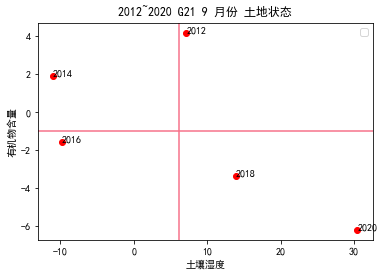

In [49]:
x=tempp['土壤湿度'].values
y=tempp['有机物含量'].values
n=[2012,2014,2016,2018,2020]

fig,ax=plt.subplots()
ax.scatter(x,y,c='r')

for i,txt in enumerate(n):
    ax.annotate(txt,(x[i],y[i]))

plt.axhline(y=y.mean(),ls="-")
plt.axvline(x=x.mean(),ls="-")
plt.legend()
plt.xlabel( '土壤湿度')
plt.ylabel( '有机物含量')
plt.title( '2012~2020 G21 9 月份 土地状态')
plt.savefig('./Q6 fig/2012~2022 G21 9月份 土地状态.jpg')

In [50]:
dataset=temp[['土壤湿度', '有机物含量']]

In [51]:
#########LSTM多变量模型#############
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences)-1:
            break
        # 最关键的不一样在这一步
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def fitlstmmodel(dataset,n_steps=1):
    #dataset：数据标准化后的dataset
    # n_steps：分片大小，默认为1
    #依次为：'PM2.5','AQI',  'PM10', 'SO2', 'CO', 'NO2', 'O3_8h', '最高气温', '最低气温'

    in_seq1= dataset[:,0].reshape((dataset.shape[0], 1))
    in_seq2= dataset[:,1].reshape((dataset.shape[0], 1))

    dataset = np.hstack((in_seq1, in_seq2))
    X, y = split_sequences(dataset, n_steps)
    n_features = X.shape[2]
    model = Sequential()
    model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(300, activation='relu'))

    # 和多对一不同点在于，这里多对多的Dense的神经元=features数目
    model.add(Dense(n_features))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=100, verbose=2,shuffle=False)
    model.save('lstm_model.h5')
    last_input=np.array(dataset[-1:,:])
    return X,y,last_input,n_features,n_steps

In [52]:

# 将整型变为float
dataset = dataset.astype('float32')
#对数据集合进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))

dataset=scaler.fit_transform(dataset)
#输入为标准化后的dataset 	#输出：X为lstm的输入，y为lstm的输出，x_input_last为最后一行dataset的数据，用于预测未来的输入,n_features是特征维度，n_steps是切片分层
X,y,last_input,n_features,n_steps=fitlstmmodel(dataset,n_steps=1)
#输入1为lstm的输入X，输入2为lstm的输出y，用于训练模型,输入3为标准化模型
#输出：testPredict为预测close的训练数据，testY为close的真实数据
#该函数目标输出训练的RMSE以及预测与训练数据的对比


Epoch 1/100
5/5 - 6s - loss: 0.2892 - 6s/epoch - 1s/step
Epoch 2/100
5/5 - 0s - loss: 0.2709 - 87ms/epoch - 17ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2491 - 332ms/epoch - 66ms/step
Epoch 4/100
5/5 - 0s - loss: 0.2207 - 196ms/epoch - 39ms/step
Epoch 5/100
5/5 - 0s - loss: 0.1846 - 311ms/epoch - 62ms/step
Epoch 6/100
5/5 - 0s - loss: 0.1420 - 178ms/epoch - 36ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0984 - 174ms/epoch - 35ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0672 - 222ms/epoch - 44ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0619 - 239ms/epoch - 48ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0678 - 152ms/epoch - 30ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0637 - 144ms/epoch - 29ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0589 - 151ms/epoch - 30ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0573 - 334ms/epoch - 67ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0553 - 266ms/epoch - 53ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0521 - 320ms/epoch - 64ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0487 - 232ms/epoch - 46ms/step
Epoch 1

5/5 [==============================] - 2s 9ms/step
MAPE :
198.4075903892517
RMSE :
5.981046
MAE :
3.8449352


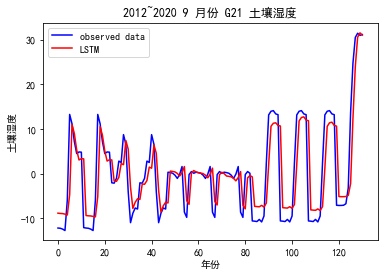

MAPE :
23.320788145065308
RMSE :
2.6839197
MAE :
1.1912462


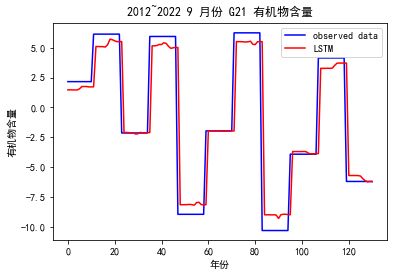

In [53]:

###预测与评分
def Predict_RMSE_BA(X,y,scaler):
    model=load_model('lstm_model.h5') 
    trainPredict = model.predict(X)
    testPredict = scaler.inverse_transform(trainPredict)
    testY = scaler.inverse_transform(y)
    score(testY[:,0], testPredict[:,0])
    
    #土壤湿度', '有机物含量'
    plt.plot(testY[:,0],color='blue', label='observed data')
    plt.plot(testPredict[:,0], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '土壤湿度')
    plt.title( '2012~2020 9 月份 G21 土壤湿度')
    plt.legend() # 显示图例
    
    plt.savefig('./Q6 fig/2012~2020 9 月份 G21 土壤湿度.jpg')
    plt.show()

    
    score(testY[:,1], testPredict[:,1])
    plt.plot(testY[:,1],color='blue', label='observed data')
    plt.plot(testPredict[:,1], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '有机物含量')
    plt.title( '2012~2022 9 月份 G21 有机物含量')
    plt.legend() # 显示图例
    
    plt.savefig('./Q6 fig/2012~2022 9 月份 G21 有机物含量.jpg')
    plt.show()

    
    
    return testPredict,testY
def score(y_true, y_pre):
    # MSE
    print("MAPE :")
    print(mean_absolute_percentage_error(y_true, y_pre)) 
    # RMSE
    print("RMSE :")
    print(np.sqrt(metrics.mean_squared_error(y_true, y_pre))) 
    # MAE
    print("MAE :")
    print(metrics.mean_absolute_error(y_true, y_pre)) 
    # # R2
    # print("R2 :")
    # print(np.abs(r2_score(y_true,y_pre)))
testPredict,testY=Predict_RMSE_BA(X,y,scaler)


In [43]:
def Predict_future_plot(predict_forword_number,x_input,n_features,n_steps,scaler,testPredict,testY):
    model=load_model('lstm_model.h5') 
    predict_list=[]
    predict_list.append(x_input)
    while len(predict_list) < predict_forword_number:

        x_input = predict_list[-1].reshape((-1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
         #预测新值
        predict_list.append(yhat)
    #取出    
    
    Predict_forword = scaler.inverse_transform(np.array([ i.reshape(-1,1)[:,0].tolist() for i in predict_list]))
    return Predict_forword[1:,:].tolist()

y_pre=Predict_future_plot(2,last_input,n_features,n_steps,scaler,testPredict,testY)
y_pre

[[31.243684784838464, -6.185738463134904]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


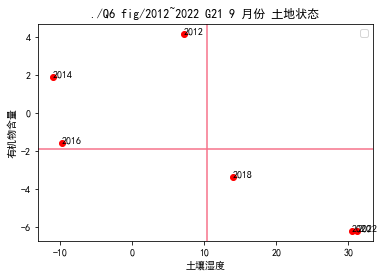

In [40]:
x=tempp['土壤湿度'].values
y=tempp['有机物含量'].values
x=np.append(x,31.243684784838464)
y=np.append(y,-6.185738463134904)
n=[2012,2014,2016,2018,2020,2022]

fig,ax=plt.subplots()
ax.scatter(x,y,c='r')

for i,txt in enumerate(n):
    ax.annotate(txt,(x[i],y[i]))

plt.axhline(y=y.mean(),ls="-")
plt.axvline(x=x.mean(),ls="-")
plt.legend()
plt.xlabel( '土壤湿度')
plt.ylabel( '有机物含量')
plt.title( './Q6 fig/2012~2022 G21 9 月份 土地状态')
plt.savefig('./Q6 fig/2012~2022 G21 9月份 土地状态.jpg')